<a href="https://colab.research.google.com/github/sugi-san/yolact_edge/blob/master/YolactEdge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

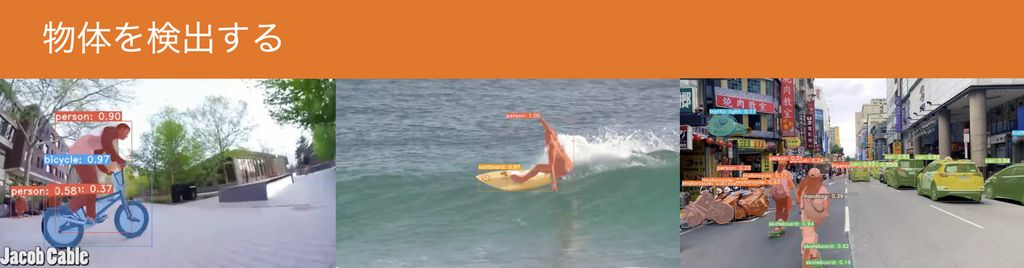

In [ ]:
#@title **1.セットアップ**

# GPUの仕様チェック
!nvidia-smi -L

# Githubからコードをコピー
!git clone https://github.com/sugi-san/yolact_edge.git
#!git clone https://github.com/chentinghao/download_google_drive.git
%cd yolact_edge

# 重みとCOCOデータのダウンロード
!mkdir -p weights
! pip install --upgrade gdown
import os
import gdown

for i in range(10):
  if os.path.isfile('./weights/yolact_edge_54_800000.pth'): 
    break
  else:  
    gdown.download('https://drive.google.com/uc?id=1-cyTqsIjmXKGzcToOQoEjE_uokn2vSoS', './weights/yolact_edge_54_800000.pth', quiet=False)

for i in range(10):
  if os.path.isfile('./calib_images_coco.zip'): 
    break
  else:        
    gdown.download('https://drive.google.com/uc?id=15jyd5CRJxNiA41UMjGbaSnmaytfeILfI', './calib_images_coco.zip', quiet=False)
! unzip -q calib_images_coco.zip


# ライブラリーのインポート
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import HTML
from base64 import b64encode
from function import *

# フォルダ作成
!mkdir -p download

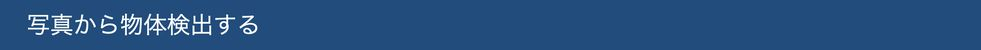

In [ ]:
#@title **2.写真の表示**
display_pic('pic')

In [ ]:
#@title **3.写真から物体検出**

picture = '05.jpg' #@param {type:"string"}

# 物体検出
!python eval.py --trained_model=weights/yolact_edge_54_800000.pth\
                --score_threshold=0.15 --top_k=100\
                --image=pic/$picture:output_img.jpg\
                --disable_tensorrt

# 画像の表示
img = cv2.imread('output_img.jpg')
cv2_imshow(img)

In [ ]:
#@title **4.画像のダウンロード**
import os
import shutil
from google.colab import files

name = os.path.splitext(picture)
file_name = 'download/'+name[0]+'_out.jpg'
shutil.copy('output_img.jpg', file_name)
files.download(file_name)

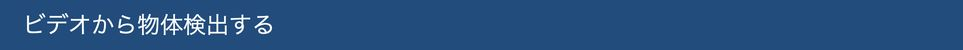

In [ ]:
#@title **5.ビデオの表示**
import os
import glob

reset_folder('pic_video')
files = sorted(glob.glob('video/*.mp4'))
names = []
for file in files:
  name = os.path.basename(file)
  save_frame(name, 'video', 'pic_video')
  names.append(name)
display_movie('pic_video', names)



In [ ]:
#@title **6.ビデオから物体検出**

video = '01.mp4' #@param {type:"string"}

# ビデオから物体検出
!python eval.py --trained_model=weights/yolact_edge_54_800000.pth\
                --score_threshold=0.15 --top_k=100\
                --video=video/$video:output_video.mp4\
                --disable_tensorrt

# コーデック変換
! ffmpeg -y -i output_video.mp4 -vcodec h264 -pix_fmt yuv420p -loglevel error output.mp4

# 動画の再生
display_mp4('output.mp4')

In [ ]:
#@title **7.動画のダウンロード**

import os
import shutil

download_name = 'download/'+os.path.splitext(video)[0]+'_out.mp4'
shutil.copy('output.mp4', download_name)

from google.colab import files
files.download(download_name)


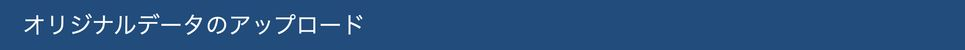

In [ ]:
#@title **8.データのアップロード**
#@markdown ・selectでpicture（.jpg）かvideo（.mp4）を選択して下さい\
#@markdown ・動画はHD以下、20秒以内を目安にして下さい
import os
import shutil
from google.colab import files
import cv2

select = 'video' #@param ["picture", "video"]

# ルートへ画像をアップロード
uploaded = files.upload()           
uploaded = list(uploaded.keys())    

# ルートから指定フォルダーへ移動
if select == 'picture':
  for file in uploaded:
      if os.path.splitext(file)[1] != '.jpg':
        break
      size_opt(file)
      shutil.move(file, 'pic/'+file)
      
if select == 'video':
  for file in uploaded:
      if os.path.splitext(file)[1] != '.mp4':
        break
      shutil.move(file, 'video/'+file)


###【備考】
・ブラウザは、必ずGoogle Chromeを使用して下さい。

・動作がおかしくなった場合の対応\
１）グーグルクロームの該当タブを削除して接続を切る\
２）再度リンクを開く\
３）右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックする（下記写真を参照に下さい）\
４）あとは、動画にある通りの操作をすればOK

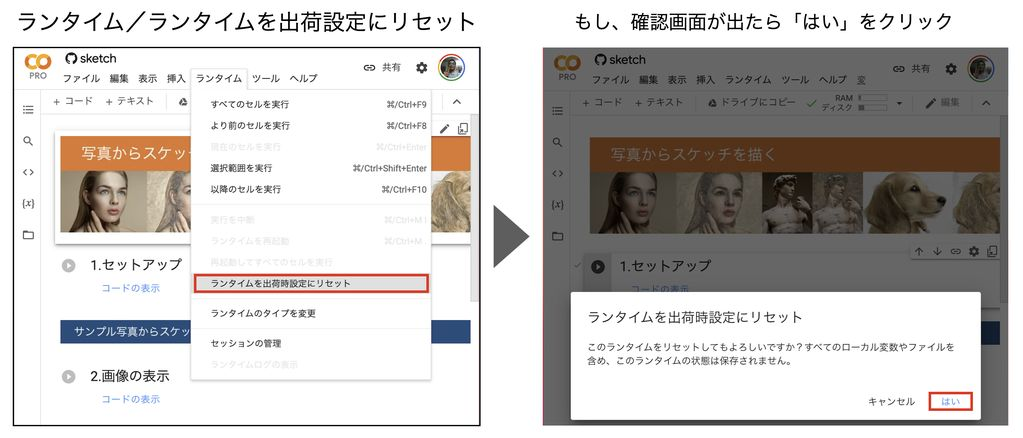